In [1]:
import math
import numpy
from matplotlib import pyplot
%matplotlib inline

In [2]:
N = 50                                
x_start, x_end = -2.0, 2.0           
y_start, y_end = -1.0, 1.0           
x = numpy.linspace(x_start, x_end, N)    
y = numpy.linspace(y_start, y_end, N)   
X, Y = numpy.meshgrid(x, y)  

In [3]:
kappa = 1.0                          
x_doublet, y_doublet = 0.0, 0.0      

u_inf = 1.0   

In [4]:
def get_velocity_doublet(strength, xd, yd, X, Y):
   
    u = - strength/(2*math.pi)*((X-xd)**2-(Y-yd)**2)/((X-xd)**2+(Y-yd)**2)**2
    v = - strength/(2*math.pi)*2*(X-xd)*(Y-yd)/((X-xd)**2+(Y-yd)**2)**2
    
    return u, v

In [5]:
def get_stream_function_doublet(strength, xd, yd, X, Y):
   
    psi = - strength/(2*math.pi)*(Y-yd)/((X-xd)**2+(Y-yd)**2)
    
    return psi

In [6]:
u_doublet, v_doublet = get_velocity_doublet(kappa, x_doublet, y_doublet, X, Y)

psi_doublet = get_stream_function_doublet(kappa, x_doublet, y_doublet, X, Y)

u_freestream = u_inf * numpy.ones((N, N), dtype=float)
v_freestream = numpy.zeros((N, N), dtype=float)

# stream-function of the freestream flow
psi_freestream = u_inf * Y

# superposition of the doublet on the freestream flow
u = u_freestream + u_doublet
v = v_freestream + v_doublet
psi = psi_freestream + psi_doublet

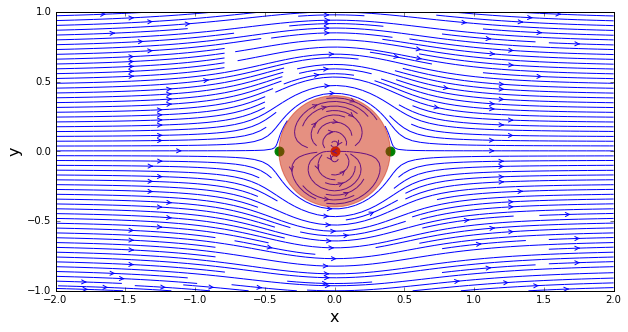

In [7]:
size = 10
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.scatter(x_doublet, y_doublet, color='#CD2305', s=80, marker='o')

# calculate the cylinder radius and add the cylinder to the figure
R = math.sqrt(kappa/(2*math.pi*u_inf))
circle = pyplot.Circle((0, 0), radius=R, color='#CD2305', alpha=0.5)
pyplot.gca().add_patch(circle)

# calculate the stagnation points and add them to the figure
x_stagn1, y_stagn1 = +math.sqrt(kappa/(2*math.pi*u_inf)), 0
x_stagn2, y_stagn2 = -math.sqrt(kappa/(2*math.pi*u_inf)), 0
pyplot.scatter([x_stagn1, x_stagn2], [y_stagn1, y_stagn2], color='g', s=80, marker='o');

In [8]:
gamma = 4.0                      
x_vortex, y_vortex = 0.0, 0.0

In [9]:
def get_velocity_vortex(strength, xv, yv, X, Y):
   
    u = + strength/(2*math.pi)*(Y-yv)/((X-xv)**2+(Y-yv)**2)
    v = - strength/(2*math.pi)*(X-xv)/((X-xv)**2+(Y-yv)**2)
    return u, v

def get_stream_function_vortex(strength, xv, yv, X, Y):
   
    psi = strength/(4*math.pi)*numpy.log((X-xv)**2+(Y-yv)**2)
    
    return psi

In [10]:
u_vortex, v_vortex = get_velocity_vortex(gamma, x_vortex, y_vortex, X, Y)

psi_vortex = get_stream_function_vortex(gamma, x_vortex, y_vortex, X, Y)

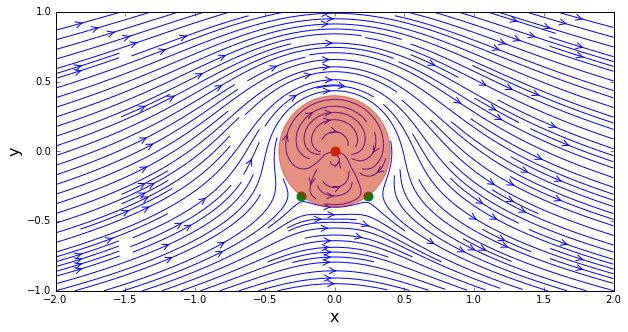

In [11]:
u = u_freestream + u_doublet + u_vortex
v = v_freestream + v_doublet + v_vortex
psi = psi_freestream + psi_doublet + psi_vortex

R = math.sqrt(kappa/(2*math.pi*u_inf))


x_stagn1, y_stagn1 = +math.sqrt(R**2-(gamma/(4*math.pi*u_inf))**2), -gamma/(4*math.pi*u_inf)
x_stagn2, y_stagn2 = -math.sqrt(R**2-(gamma/(4*math.pi*u_inf))**2), -gamma/(4*math.pi*u_inf)


size = 10
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1.5, arrowstyle='->')
circle = pyplot.Circle((0, 0), radius=R, color='#CD2305', alpha=0.5)
pyplot.gca().add_patch(circle)
pyplot.scatter(x_vortex, y_vortex, color='#CD2305', s=80, marker='o')
pyplot.scatter([x_stagn1, x_stagn2], [y_stagn1, y_stagn2], color='g', s=80, marker='o');

Challengetask1

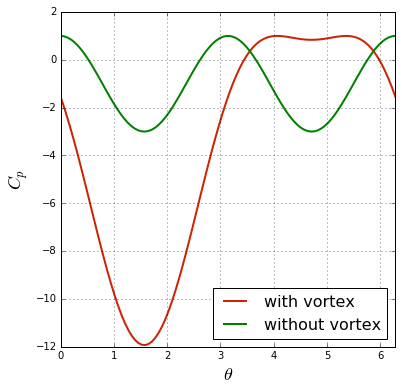

In [13]:
#calculate the surface tangential velocity on the cylinder
theta = numpy.linspace(0, 2*math.pi, 100)
u_theta = -2*u_inf*numpy.sin(theta) - gamma/(2*math.pi*R)

# compute the surface pressure coefficient
cp = 1.0 - (u_theta/u_inf)**2

# if there was no vortex
u_theta_no_vortex = -2*u_inf*numpy.sin(theta)
cp_no_vortex = 1.0 - (u_theta_no_vortex/u_inf)**2

# plot the surface pressure coefficient
size = 6
pyplot.figure(figsize=(size, size))
pyplot.grid(True)
pyplot.xlabel(r'$\theta$', fontsize=18)
pyplot.ylabel('$C_p$', fontsize=18)
pyplot.xlim(theta.min(), theta.max())
pyplot.plot(theta, cp, label='with vortex', color='#CD2305', linewidth=2, linestyle='-')
pyplot.plot(theta, cp_no_vortex, label='without vortex', color='g', linewidth=2, linestyle='-')
pyplot.legend(loc='best', prop={'size':16});

Challengetask2